In [1]:
import numpy as np 
import pandas as pd 
from scipy import spatial

import warnings
warnings.filterwarnings('ignore')

import re
import os

In [2]:
ratings = pd.read_csv(r'C:\Users\battu\Desktop\DM\dataset\training.csv', sep=',')
movies_data = pd.read_csv(r'C:\Users\battu\Desktop\DM\dataset\movies.csv', low_memory=False)

In [3]:
print(ratings.shape)
ratings.head(5)

(9997850, 4)


,userId,movieId,rating,timestamp
0,142882,91658,2.5,1515209647000
1,142882,4344,1.0,1515209646000
2,142882,45720,2.0,1515209643000
3,142882,4734,2.0,1515209641000
4,142882,91542,2.0,1515209637000


In [4]:
pd.options.display.float_format = '{:f}'.format
ratings['rating'].describe()

count   9997850.000000
mean          3.558811
std           1.067378
min           0.500000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: rating, dtype: float64

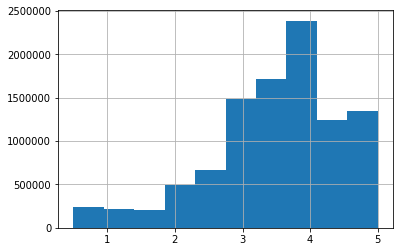

In [5]:
ratings['rating'].hist()

rating    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

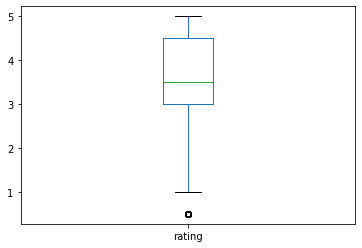

In [6]:
ratings['rating'].plot(kind='box', subplots=True)

In [7]:
movieRatingsAggr = ratings.groupby(['movieId']).agg({'rating': [np.size, np.mean]})
movieRatingsAggr.reset_index(inplace=True)
#movieRatingsAggr.head()

In [8]:
movieRatingsAggr['rating'].describe()

,size,mean
count,49151.000000,49151.000000
mean,203.410917,3.083162
std,1163.066408,0.748898
min,1.000000,0.500000
25%,2.000000,2.708333
50%,6.000000,3.166667
75%,30.000000,3.539474
max,42120.000000,5.000000


In [9]:
print(movies_data.shape)
movies_data.head(5)

(49174, 12)


,movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,Toy Story (1995),11/19/1995,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",114709,862,"Adventure,Animation,Children,Comedy,Fantasy",NaN,nan,nan,NaN
1,2,Jumanji (1995),12/15/1995,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",113497,8844,"Adventure,Children,Fantasy",NaN,nan,nan,NaN
2,3,Grumpier Old Men (1995),1/1/1995,Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",113228,15602,"Comedy,Romance",NaN,nan,nan,NaN
3,4,Waiting to Exhale (1995),1/15/1996,Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",114885,31357,"Comedy,Drama,Romance",NaN,nan,nan,NaN
4,5,Father of the Bride Part II (1995),12/8/1995,Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",113041,11862,Comedy,NaN,nan,nan,NaN


In [10]:
# dropping few columns and csv file Unnamed empty columns
movies = movies_data[['movieId', 'title', 'directedBy', 'starring', 'genres']]
movies.head()
len(movies)

49174

In [11]:
movies.dropna(subset = ["title"], inplace = True)
len(movies)

49172

In [12]:
movies['year'] = (movies['title'].str.extract('.*\((.*)\).*', expand=True))
movieRatingsAggr.columns = ['movieId', 'rating_count', 'rating_avg']
movies = movies.merge(movieRatingsAggr, left_on='movieId', right_on='movieId', how='left')

In [13]:
movies = movies[['movieId', 'title', 'directedBy', 'starring', 'genres', 'year', 'rating_count', 'rating_avg']]
movies.head()

,movieId,title,directedBy,starring,genres,year,rating_count,rating_avg
0,1,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...","Adventure,Animation,Children,Comedy,Fantasy",1995,20666.000000,3.799308
1,2,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...","Adventure,Children,Fantasy",1995,6620.000000,3.302115
2,3,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...","Comedy,Romance",1995,1022.000000,2.943738
3,4,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...","Comedy,Drama,Romance",1995,131.000000,2.736641
4,5,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",Comedy,1995,2218.000000,2.887511


In [14]:
movies.dropna(subset = ["genres"], inplace=True)
len(movies)

45862

In [15]:
genresList = [
  "Action",
  "Adventure",
  "Animation",
  "Children",
  "Comedy",
  "Crime",
  "Documentary",
  "Drama",
  "Fantasy",
  "Film-Noir",
  "Horror",
  "Musical",
  "Mystery",
  "Romance",
  "Sci-Fi",
  "Thriller",
  "War",
  "Western",
  "(no genres listed)"
]
def setGenresMatrix(genres):
    movieGenresMatrix = []
    movieGenresList = genres.split(',')
    for g in genresList:
        if (g in movieGenresList):
            movieGenresMatrix.append(1)
        else:
            movieGenresMatrix.append(0) 
    return movieGenresMatrix
    
movies['genresMatrix'] = movies.apply(lambda x: np.array(list(setGenresMatrix(x['genres']))), axis=1)

movies.head(5)

,movieId,title,directedBy,starring,genres,year,rating_count,rating_avg,genresMatrix
0,1,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...","Adventure,Animation,Children,Comedy,Fantasy",1995,20666.000000,3.799308,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...","Adventure,Children,Fantasy",1995,6620.000000,3.302115,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...","Comedy,Romance",1995,1022.000000,2.943738,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,4,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...","Comedy,Drama,Romance",1995,131.000000,2.736641,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
4,5,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",Comedy,1995,2218.000000,2.887511,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
# Parameter weights
genresSimilarityWeight = 0.7
ratingAvgWeight = 0.3
#yearDistanceWeight = 0.1
    
def checkSimilarity(movieId):
    # print("SIMILAR MOVIES TO:")
    # print (movies[movies['movieId'] == movieId][['title', 'rating_count', 'rating_avg']])
    basisGenres = np.array(list(movies[movies['movieId'] == movieId]['genresMatrix']))
    basisYear = int(movies[movies['movieId'] == movieId]['year'])
    basisRatingAvg = movies[movies['movieId'] == movieId]['rating_avg']
    
    moviesWithSim = movies
    moviesWithSim['similarity'] = moviesWithSim.apply(lambda x: 
                                                      spatial.distance.cosine(x['genresMatrix'], basisGenres) * genresSimilarityWeight+
                                                      abs(basisRatingAvg - x['rating_avg']) * ratingAvgWeight 
                                                      #+ abs(basisYear - x['year'])/100 * yearDistanceWeight
                                                     , axis=1)
    
    moviesWithSim = moviesWithSim.loc[(moviesWithSim.movieId != movieId)]
    return moviesWithSim[['movieId', 'title', 'genres', 'rating_count', 'rating_avg', 'similarity']].sort_values('similarity')


In [17]:
similarityResult  = checkSimilarity(2571)
similarityResult.head(5)

,movieId,title,genres,rating_count,rating_avg,similarity
529,541,Blade Runner (1982),"Action,Sci-Fi,Thriller",13226.000000,4.055459,0.015463
40962,162434,UFO... annientare S.H.A.D.O. stop. Uccidete St...,"Action,Sci-Fi,Thriller",3.000000,4.166667,0.017899
43970,170283,The Time Shifters (1999),"Sci-Fi,Thriller,Action",3.000000,4.166667,0.017899
27291,122752,Nemesis 4: Death Angel (1996),"Action,Sci-Fi,Thriller",1.000000,4.000000,0.032101
11197,44191,V for Vendetta (2006),"Action,Sci-Fi,Thriller,IMAX",17715.000000,3.932035,0.052491


In [18]:
similarityResult  = checkSimilarity(27)
similarityResult.head(5)

,movieId,title,genres,rating_count,rating_avg,similarity
18906,91302,"Tree, The (2010)","Children,Drama",24.000000,3.520833,0.001789
10770,39307,Dreamer: Inspired by a True Story (2005),"Children,Drama",90.000000,3.527778,0.003872
41596,164204,After the Storm (2016),"Children,Drama",34.000000,3.529412,0.004363
46585,176269,Subdue,"Drama,Children",1.000000,3.500000,0.004461
48440,181595,Sara and Ayda (2017),"Children,Drama",1.000000,3.500000,0.004461


In [27]:
import random

mid = (random.choice(movies['movieId']))
print("MovieId",mid)
similarityResult = checkSimilarity(mid)
similarityResult.head(8)

MovieId 169590


,movieId,title,genres,rating_count,rating_avg,similarity
26310,118995,The Two Firefighters (1968),Comedy,1.000000,5.000000,0.000000
46338,175737,Ducoboo (2011),Comedy,1.000000,5.000000,0.000000
23461,108658,40 Carats (1973),Comedy,1.000000,5.000000,0.000000
49078,183057,Goldstein (1965),Comedy,1.000000,5.000000,0.000000
23768,109715,Inquire Within (2012),Comedy,1.000000,5.000000,0.000000
44761,172049,Make Way For A Lady (1936),Comedy,1.000000,5.000000,0.000000
46336,175733,Dépression et des Potes (2012),Comedy,2.000000,5.000000,0.000000
35543,146946,The Hardy Bucks Movie (2013),Comedy,1.000000,5.000000,0.000000
